In [29]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv("Desktop/resources/housing.csv")
df.head()
df.population.max()

35682.0

In [31]:
df.info() # hepsini yorumlamamızı ister sınavda
# toplam 20640 alan var, 4.indexte boş alanlar var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [32]:
df.isnull().sum() # null olan alanların sayısını gösterir
# boş olana sahip kayıtlar silinir
# ortalama ile doldurma 
# medyan ile doldurma 
# lineer interpolasyona ile doldurma

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [33]:
df["total_bedrooms"].mean(),df["total_bedrooms"].median()

(537.8705525375618, 435.0)

In [34]:
import matplotlib.pyplot as plt

(array([1.5304e+04, 4.1460e+03, 6.8200e+02, 1.7700e+02, 7.0000e+01,
        2.3000e+01, 1.8000e+01, 8.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([1.0000e+00, 6.4540e+02, 1.2898e+03, 1.9342e+03, 2.5786e+03,
        3.2230e+03, 3.8674e+03, 4.5118e+03, 5.1562e+03, 5.8006e+03,
        6.4450e+03]),
 <BarContainer object of 10 artists>)

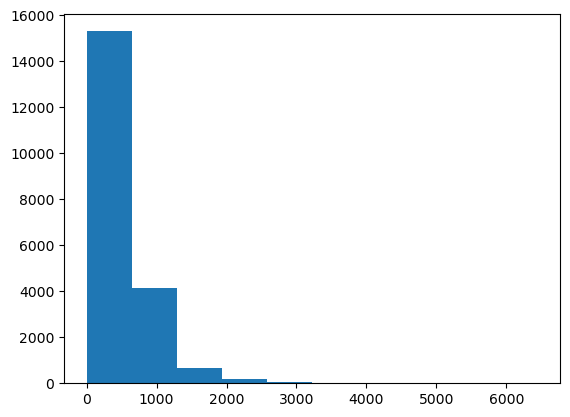

In [35]:
plt.hist(df["total_bedrooms"])
#plt.hist(df["population"])

In [36]:
import seaborn as sns

<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

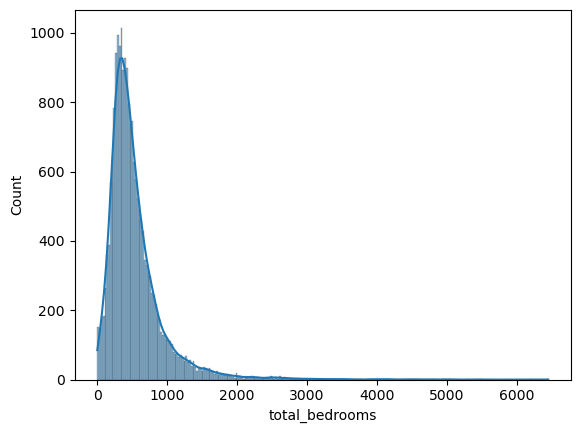

In [37]:
sns.histplot(data=df, x="total_bedrooms", kde=True) # minimum kaç max kaç sınav bedroom var, conda update --all yaz 

In [38]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [39]:
df["total_bedrooms"].sum() 

10990309.0

<AxesSubplot:>

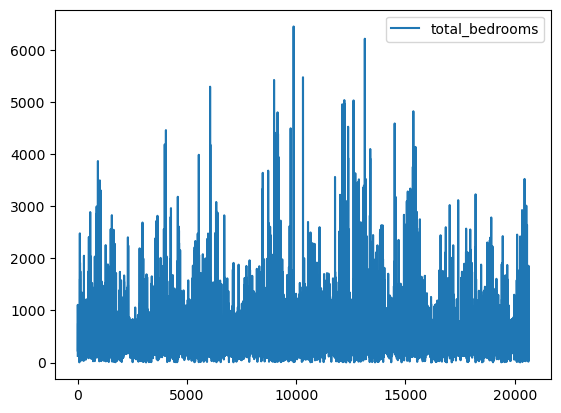

In [40]:
df.plot(y="total_bedrooms")

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000


In [42]:
df.columns # girişler ve çıkış oluyor, input outout, independent dependent, X y son sütuna olan veriler giriş son satır çıkış

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [43]:
# median house value tahmin et, o çıkış kalanlar giriş

In [44]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [45]:
df_X = df.drop("median_house_value", axis=1) # istediğimiz sütunu en sona aldık böyle 
df_y = df["median_house_value"]
df = df_X.join(df_y)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700.0


In [46]:
# giriş üzerinde korelasyon diye bişey var  
# giriş değişkenlerin çıkış değişkeninle bi ilişkisi var mı
# 1e positif doğru güçlü ilişki, -1e doğruysa negatif güçlü ilişki

In [47]:
df.corr() # koralasyon tablosu

/tmp/ipykernel_3435/163659304.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # koralasyon tablosu


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


/tmp/ipykernel_3435/2206254137.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu") # korelasyon tablosu, cmap -> görünüşdef test_get_all_by_host_with_pool(self):


<AxesSubplot:>

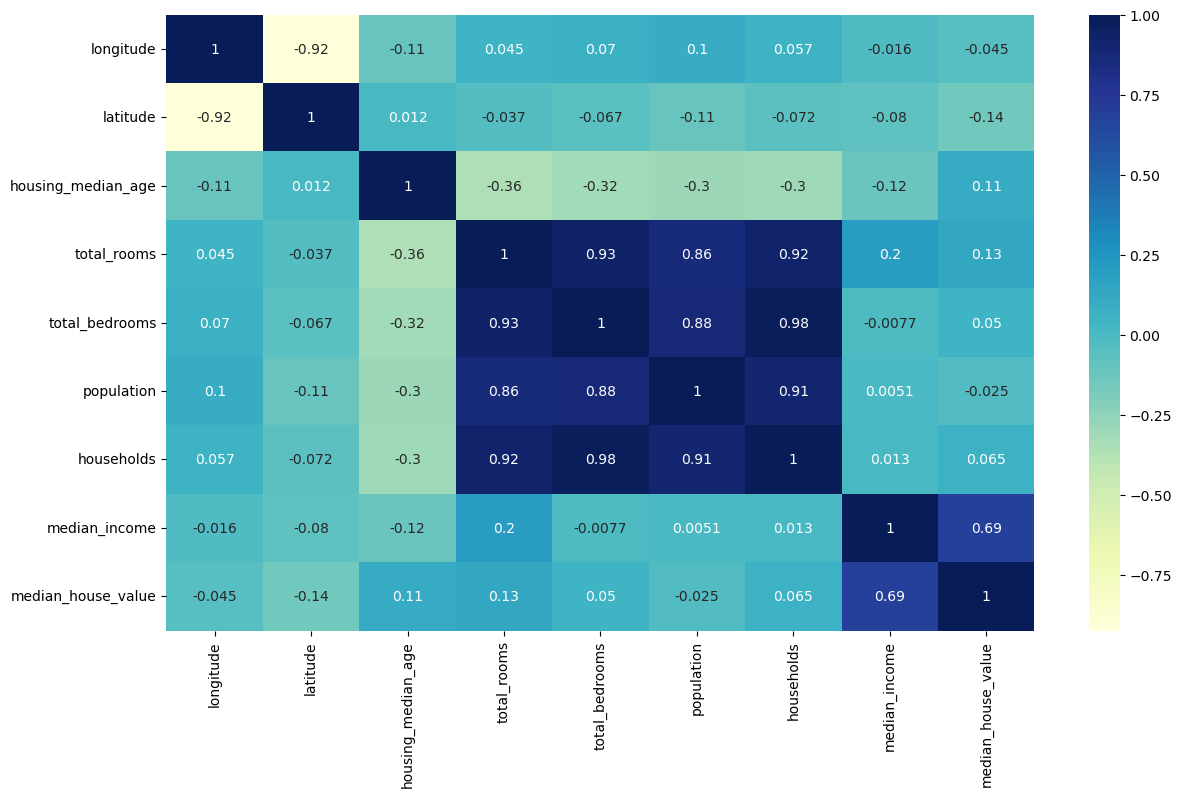

In [48]:
plt.figure(figsize=(14, 8)) #büyüttük
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu") # korelasyon tablosu, cmap -> görünüş
# korelasyona bakarsın varsa önemli yoksa değil,  koyu güçlü ilişki demek , çoklu bağlantı 
# giriş değişkenler arasında güçlü ilişki varsa çoklu bağlantı problemi olur
# giriş üzerinde korelasyon diye bişey var  
# giriş değişkenlerin çıkış değişkeninle bi ilişkisi var mı
# 1e positif doğru güçlü ilişki, -1e doğruysa negatif güçlü ilişki

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

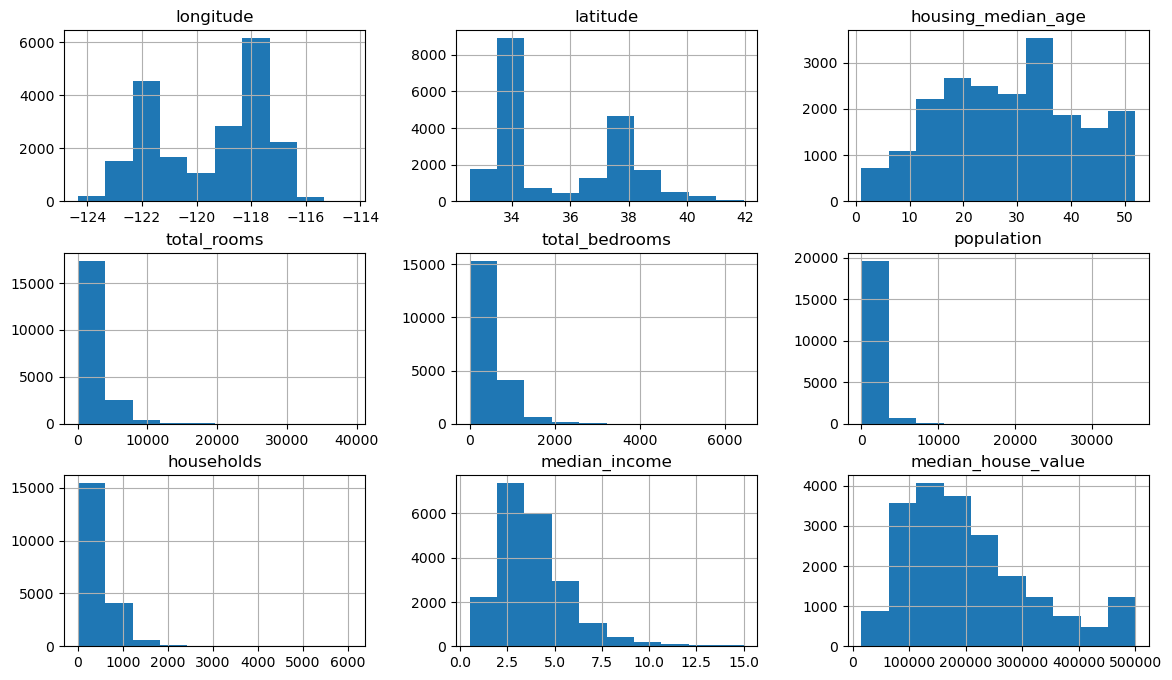

In [49]:
df.hist(figsize=(14, 8))# sınavda bunlarla yorumlar istencek 

In [50]:
df["total_rooms"] = np.log(df["total_rooms"]) + 1
df["total_bedrooms"] = np.log(df["total_bedrooms"]) + 1
df["population"] = np.log(df["population"]) + 1
df["households"] = np.log(df["households"]) + 1 

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

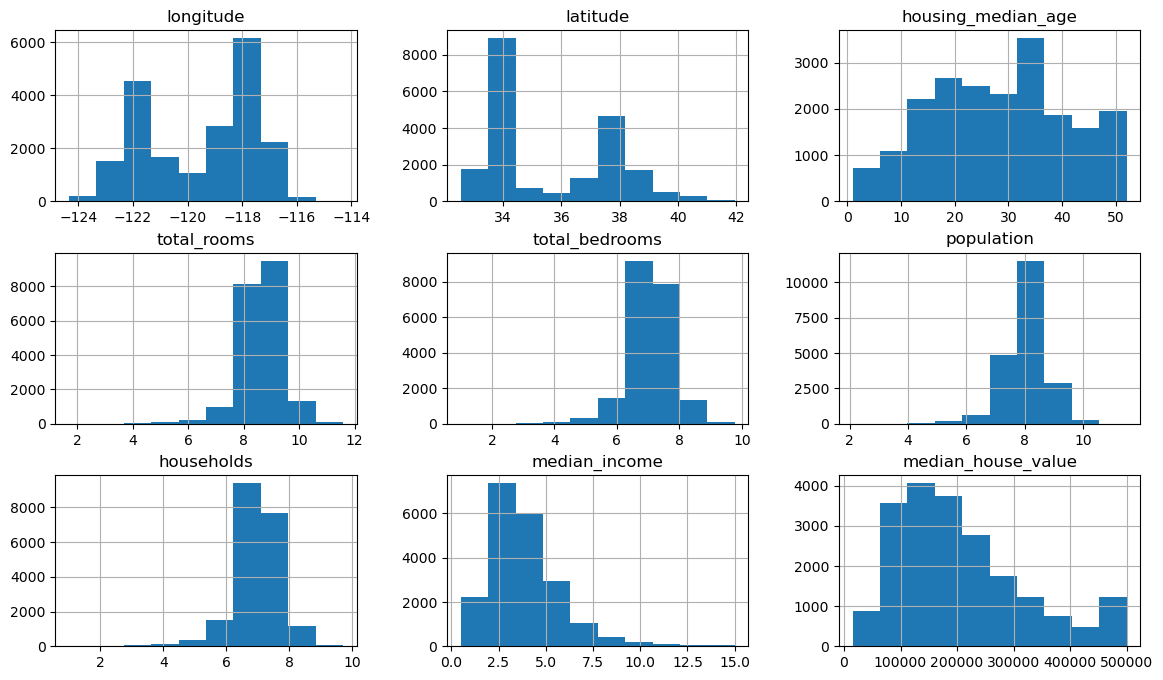

In [51]:
df.hist(figsize=(14, 8)) #dağılıma çözüm bulmuş olduk

/tmp/ipykernel_3435/4230535159.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu") # hala çoklu bağlantı sıkıntısı var bu yüzden bi kaç tanesini silmemiz lazım


<AxesSubplot:>

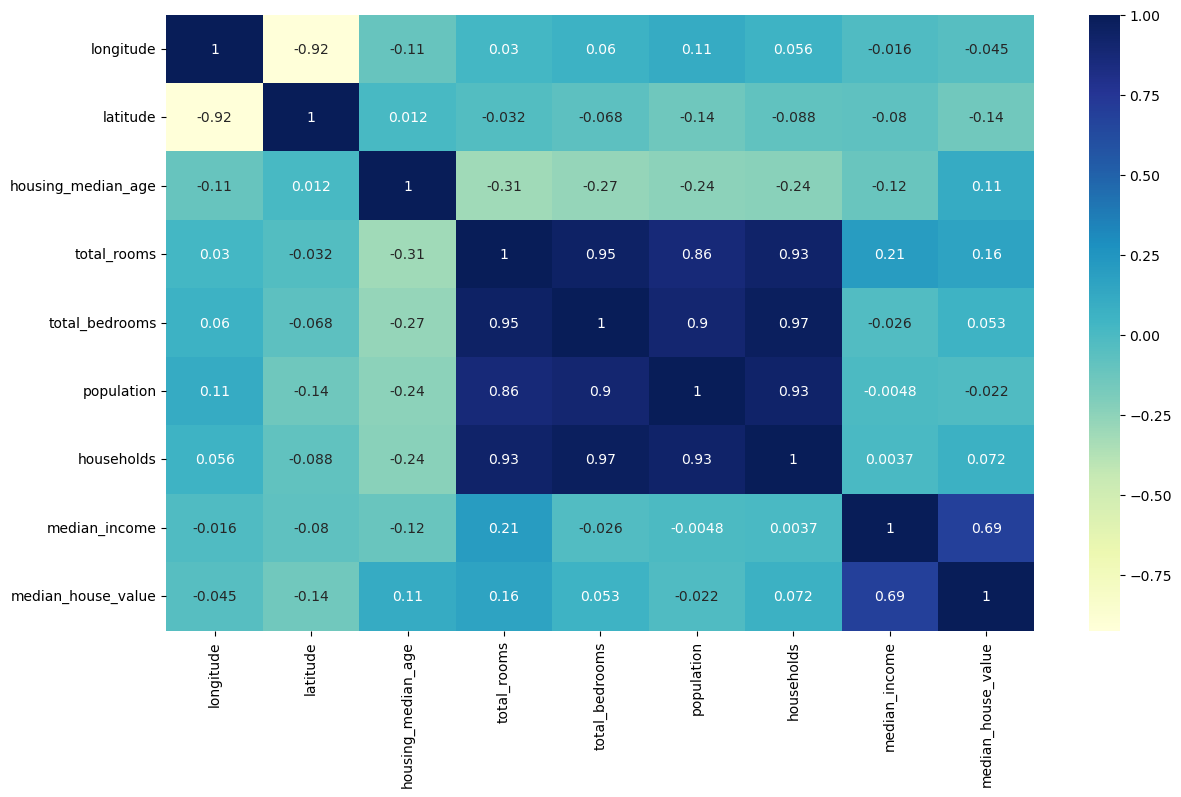

In [52]:
plt.figure(figsize=(14, 8)) 
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu") # hala çoklu bağlantı sıkıntısı var bu yüzden bi kaç tanesini silmemiz lazım

In [53]:
df.drop(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households'],axis=1, inplace=True)
df

,median_income,ocean_proximity,median_house_value
0,8.3252,NEAR BAY,452600.0
1,8.3014,NEAR BAY,358500.0
2,7.2574,NEAR BAY,352100.0
3,5.6431,NEAR BAY,341300.0
4,3.8462,NEAR BAY,342200.0
...,...,...,...
20635,1.5603,INLAND,78100.0
20636,2.5568,INLAND,77100.0
20637,1.7000,INLAND,92300.0
20638,1.8672,INLAND,84700.0


In [54]:
df.columns # sayısal bir değeri sözel değerle olmaz

Index(['median_income', 'ocean_proximity', 'median_house_value'], dtype='object')

In [55]:
df["ocean_proximity"].unique() # 5 tane sözel değer var, sayısala çeviricez

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [56]:
pd.get_dummies(df.ocean_proximity) #5 farklı alandan oluşan dataFrame oluşturdu, doğru olan 1 ya da yakın olan

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [57]:
df= df.join(pd.get_dummies(df.ocean_proximity)).drop("ocean_proximity", axis=1) # yaptığımız yeni dataframei ilk dataframe'e ekledik
df

,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,8.3252,452600.0,0,0,0,1,0
1,8.3014,358500.0,0,0,0,1,0
2,7.2574,352100.0,0,0,0,1,0
3,5.6431,341300.0,0,0,0,1,0
4,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...
20635,1.5603,78100.0,0,1,0,0,0
20636,2.5568,77100.0,0,1,0,0,0
20637,1.7000,92300.0,0,1,0,0,0
20638,1.8672,84700.0,0,1,0,0,0


<AxesSubplot:>

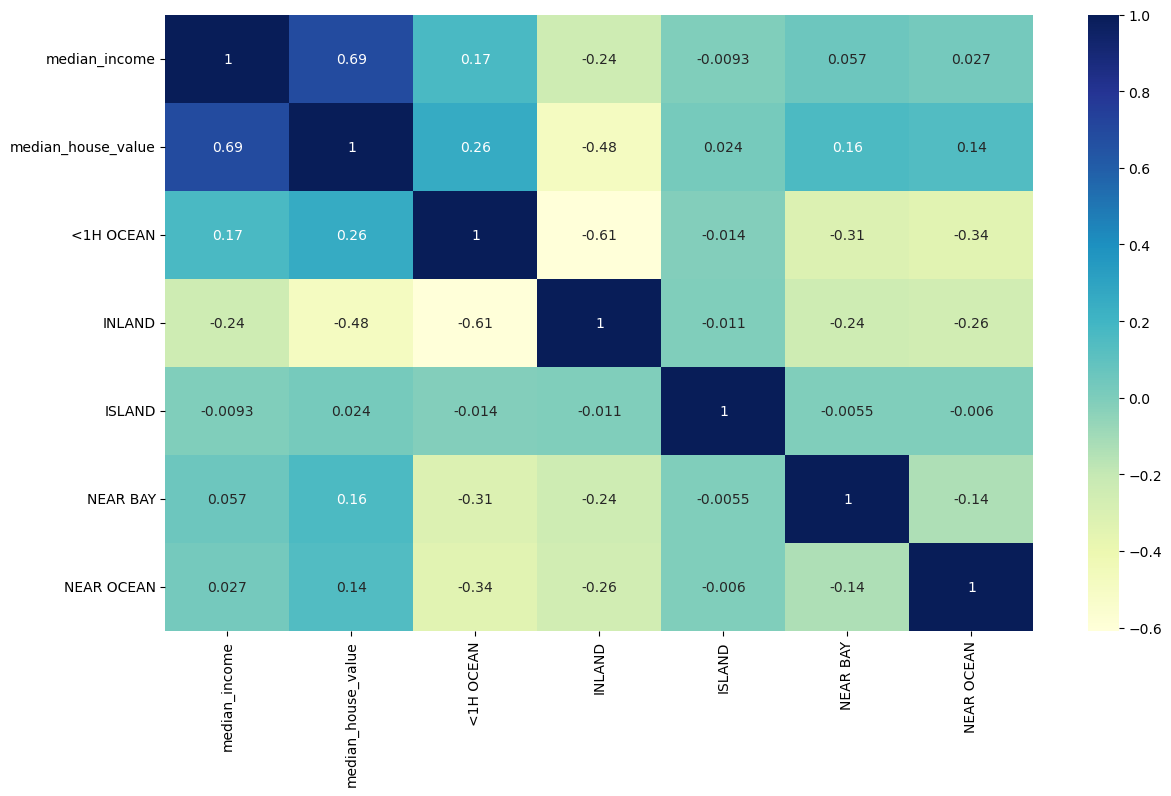

In [58]:
plt.figure(figsize=(14, 8)) 
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [59]:
# veri seti ikiye ayrılır, 1-Train(Eğitim)-> Modeli oluşturmak için
# 2-Test(Test)-> modeli test etmek için
#%80i eğitim, %20 test için
# 1- Random yapabiliriz
# 2- Elle ayırabiliriz 
# zaman serisi yoksa Random yaparız



# Cross-Validation ( Çapraz doğrulama )
# eldeki veri n eşit kümeye ayrılır
# n=5, 1 2 3 4 5 
# 1inci adım [1,2,3,4,5] Eğitim, 1 test
# 2inci adım [1,2,3,4,5] Eğitim, 2 test
# 3üncü adım [1,2,3,4,5] Eğitim, 3 test
# 4üncü adım [1,2,3,4,5] Eğitim, 4 test
# 5inci adım [1,2,3,4,5] Eğitim, 5 test

In [74]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]
X

,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,8.3252,0,0,0,1,0
1,8.3014,0,0,0,1,0
2,7.2574,0,0,0,1,0
3,5.6431,0,0,0,1,0
4,3.8462,0,0,0,1,0
...,...,...,...,...,...,...
20635,1.5603,0,1,0,0,0
20636,2.5568,0,1,0,0,0
20637,1.7000,0,1,0,0,0
20638,1.8672,0,1,0,0,0


In [61]:
#elimdeki veriyi eğitimle teste ayırıcam
from sklearn.model_selection import train_test_split # bunu yapmak için bunu import etmemiz lazım

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) # giriş, çıkış, 42yi istediğimiz gibi değiştirebiliriz

In [63]:
#artık modelimizi kurabiliriz, lineer regresyon kurucaz
# y = ax1 + bx2+ Beta
from sklearn.linear_model import LinearRegression # bunut import etmemiz lazım modeli kurmak için

In [64]:
model = LinearRegression() # nesne oluşturdum 

In [65]:
# modelimi eğitim setini kullanarak oluşturucam, modeli eğitmek için kullandığımız metot
model.fit(X_train, y_train)

LinearRegression()

In [69]:
model.coef_ # bu katsayılar xtekilere ait , ax+b coef burdaki sabit sayılar, a gibi

array([  37042.78919954,  -43061.24600151, -121026.37632293,
        216061.51331833,  -24702.9581354 ,  -27270.93285848])

In [70]:
X.columns

Index(['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [71]:
model.intercept_ # sabit katsayı gösterir ax+b'deki b intercept oluyor 

126758.2383544753

In [72]:
#testin sonuçlarını bulalım, Regresyon metrik 0<= R'2 <=1
y_pred = model.predict(X_test) # girişler otomatik olarak hesaplanır, predict tahminler 

In [73]:
from sklearn.metrics import r2_score

In [96]:
r2_score(y_test, y_pred) # bu genel, heryerde kullanabiliriz

0.5886326488975673

In [97]:
model.score(X_test, y_test) # aynı r2yi böyle de bulabiliriz 

0.5886326488975673

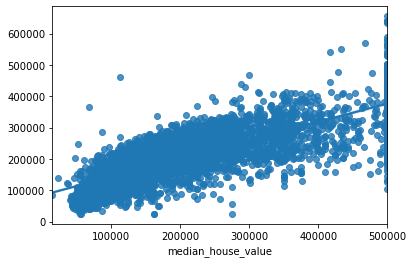

In [101]:
sns.regplot(x=y_test, y=y_pred) # regresyon grafiği

In [ ]:
# web seti verip bütün bunları yapmamızı ister